# Data Cleaning

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


sns.set_style("whitegrid")


In [2]:
df = pd.read_excel("sales_data.xlsx")


In [3]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)
df.ffill(inplace=True)



In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')


In [7]:
# KPI CALCULATIONS
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Total Profit: ${total_profit:,.0f}")
print(f"Total Orders: {total_orders}")


Total Sales: $2,297,201
Total Profit: $286,397
Total Orders: 5009


## 1. Monthly Sales Trend

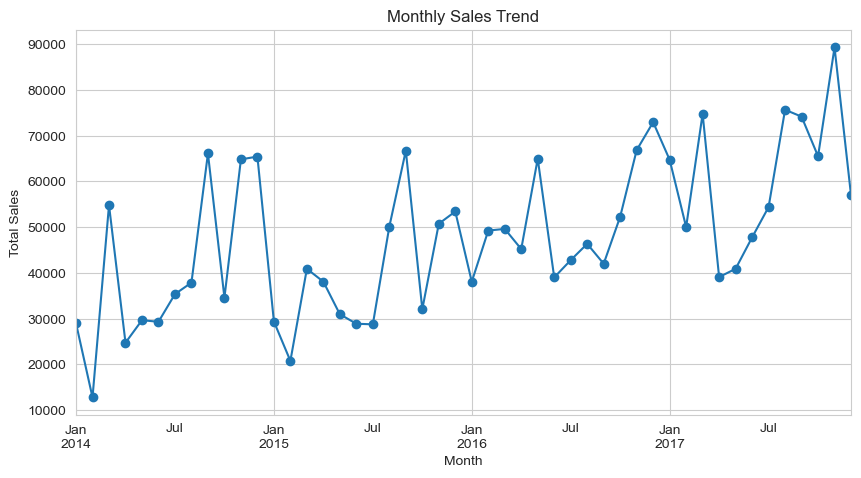

In [8]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


## 2. Top 10 Best-Selling Products

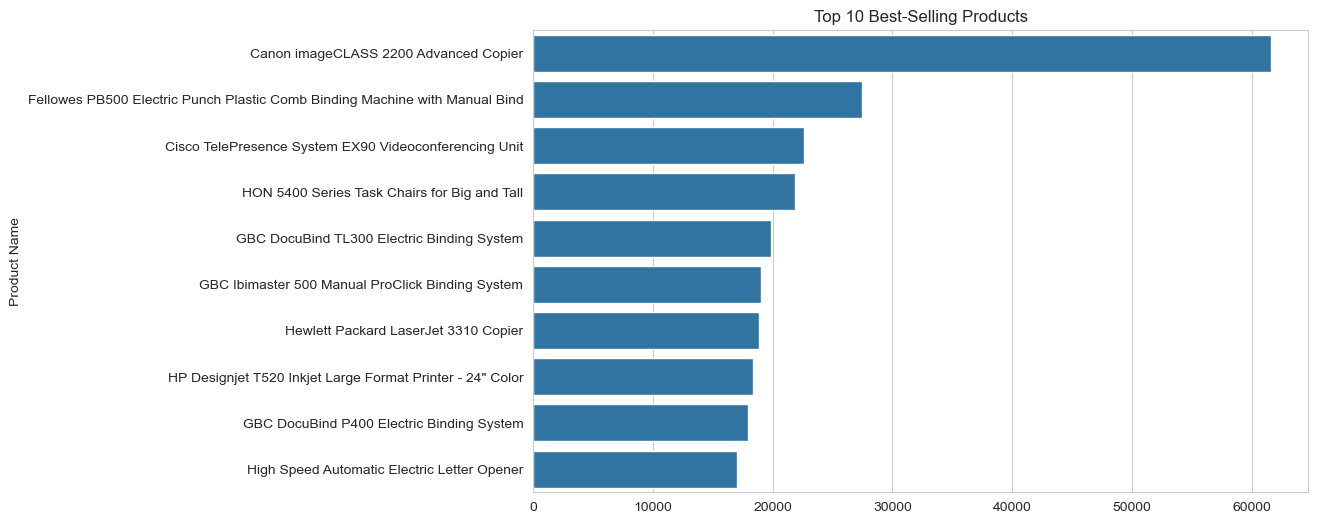

In [9]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.show()


## 3. Sales by Region

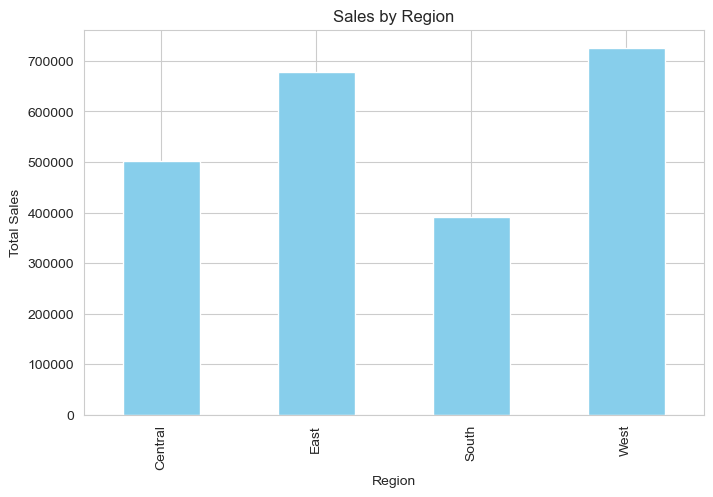

In [10]:
region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.show()


## 4. Sales by Category

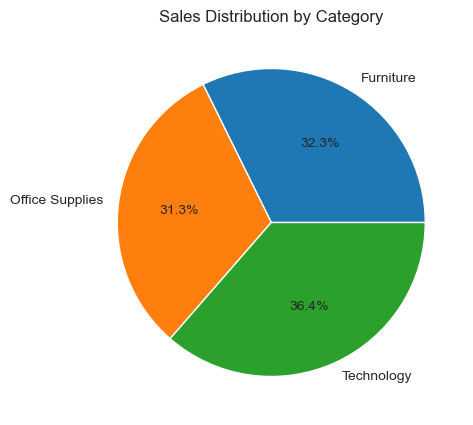

In [11]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8,5))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()


## 5. Orders per Customer Segment

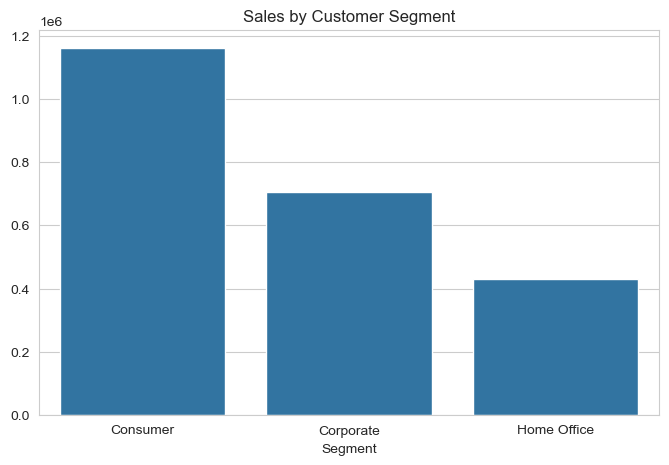

In [12]:
segment_sales = df.groupby('Segment')['Sales'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=segment_sales.index, y=segment_sales.values)
plt.title("Sales by Customer Segment")
plt.show()


# 📊 Sales Data Analysis Dashboard  
### Business Insights from Sales Dataset
### This dashboard summarizes sales trends, top products, regional performance, and customer behavior.


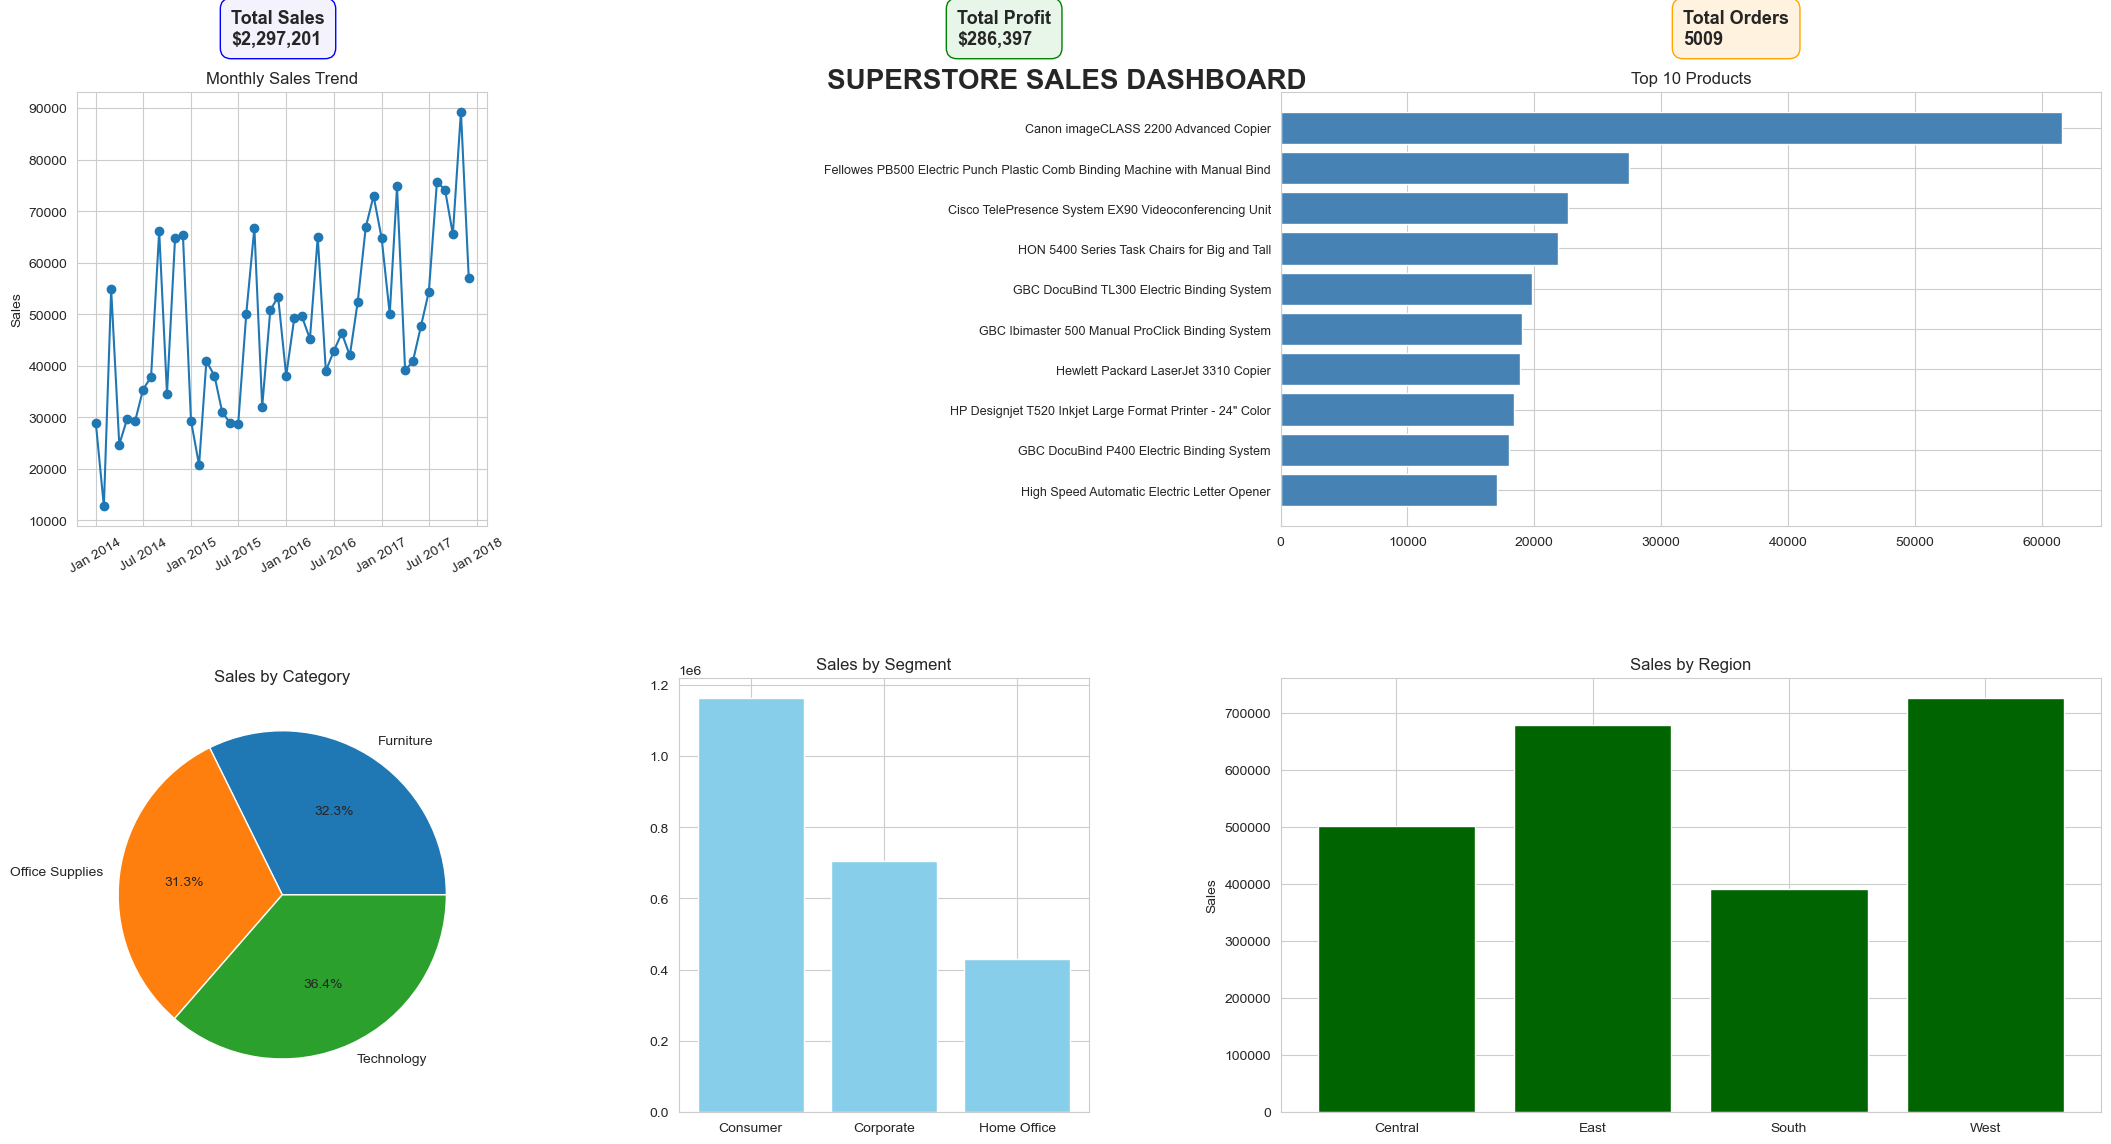

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.facecolor'] = 'white'

monthly_sales = df.groupby('Month')['Sales'].sum()
region_sales = df.groupby('Region')['Sales'].sum()
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
category_sales = df.groupby('Category')['Sales'].sum()
segment_sales = df.groupby('Segment')['Sales'].sum()

monthly_sales.index = monthly_sales.index.astype(str)

# DASHBOARD LAYOUT 
fig, axes = plt.subplots(
    2, 3,
    figsize=(22, 12),
    gridspec_kw={'width_ratios': [1, 1, 2]}  
)

plt.subplots_adjust(wspace=0.5, hspace=0.4)
fig.suptitle("SUPERSTORE SALES DASHBOARD", fontsize=20, fontweight='bold', y = 0.94)

# Monthly Sales Trend 
monthly_sales = df.groupby('Month')['Sales'].sum()

# Convert to datetime
monthly_sales.index = pd.to_datetime(monthly_sales.index.astype(str))

axes[0, 0].plot(monthly_sales.index, monthly_sales.values, marker='o')

axes[0, 0].set_title("Monthly Sales Trend")
axes[0, 0].set_ylabel("Sales")

# Show label every 6 months
axes[0, 0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axes[0, 0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

axes[0, 0].tick_params(axis='x', rotation=30)

# Top 10 Products 
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

axes[0,2].barh(top_products.index, top_products.values, color='steelblue')
axes[0,2].set_title("Top 10 Products")
axes[0,2].tick_params(axis='y', labelsize=9)
axes[0,2].invert_yaxis()

# Sales by Category 
axes[1, 0].pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
axes[1, 0].set_title("Sales by Category")

# Sales by Segment 
axes[1, 1].bar(segment_sales.index, segment_sales.values, color='skyblue')
axes[1, 1].set_title("Sales by Segment")

# Sales by Region
axes[1, 2].bar(region_sales.index, region_sales.values, color='darkgreen')
axes[1, 2].set_title("Sales by Region")
axes[1, 2].set_ylabel("Sales")
axes[0,1].axis('off')

plt.subplots_adjust(left=0.05, right=0.97, top=0.92, bottom=0.07, wspace=0.35, hspace=0.35)

# KPI TEXT BOXES
fig.text(0.12, 0.96, f"Total Sales\n${total_sales:,.0f}",
         fontsize=13, weight='bold',
         bbox=dict(facecolor='#F3F2FD', edgecolor='blue', boxstyle='round,pad=0.6'))

fig.text(0.45, 0.96, f"Total Profit\n${total_profit:,.0f}",
         fontsize=13, weight='bold',
         bbox=dict(facecolor='#E8F5E9', edgecolor='green', boxstyle='round,pad=0.6'))

fig.text(0.78, 0.96, f"Total Orders\n{total_orders}",
         fontsize=13, weight='bold',
         bbox=dict(facecolor='#FFF3E0', edgecolor='orange', boxstyle='round,pad=0.6'))

plt.savefig("superstore_sales_dashboard.png", dpi=300, bbox_inches='tight')

plt.show()




# Key Insights:
## Monthly Sales Trend
### Sales show an overall upward trend with some fluctuations, suggesting steady business growth along with seasonal or demand-based variations.

## Top 10 Products
### A few products contribute most of the revenue, indicating key best-sellers that should be prioritized for marketing and inventory planning.

## Sales by Region
### The West region leads in sales, while the South performs the lowest, showing clear regional differences and opportunities for expansion.

## Sales by Category
### Technology generates the highest sales, making it the primary revenue driver, while Furniture and Office Supplies provide stable additional income.

## Sales by Segment
### The Consumer segment contributes the most sales, showing strong reliance on individual customers and potential to grow corporate segments.